Here I reproduced node2vec paper results for one of their data (Karate) which is available on github. I showed two thing: 1) the size of embedding is k-1. For example if we ask 3 dim, it will give us a 2 embedding. 2) The final embedding results is not that different with different types of walks. But perhaps we need to find a measure to say how different two embeddings are really are

In [ ]:
import argparse
import numpy as np
import networkx as nx
import cell.node2vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from cell import analysis, utils

In [2]:
def read_graph(weighted, directed, edgelist):
	'''
	Reads the input network in networkx.
	'''
	if weighted:
		G = nx.read_edgelist(edgelist, nodetype=int, data=(('weight',float),), create_using=nx.DiGraph())
	else:
		G = nx.read_edgelist(edgelist, nodetype=int, create_using=nx.DiGraph())
		for edge in G.edges():
			G[edge[0]][edge[1]]['weight'] = 1

	if not directed:
		G = G.to_undirected()

	return G

#### Just using this for the color representations of the nodes

In [236]:
#I am just going to use the colors from this cldf
cldf= utils.read_visp_npp_cldf()

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


### Creating the graph

In [3]:
nx_G = read_graph(False, False, "/Users/fahimehb/Documents/NPP_GNN_project/dat/node2vec/graph/karate.edgelist")

In [4]:
nx_G

In [5]:
G = cell.node2vec.Graph(nx_G, False, 1, 1)

In [6]:
G.preprocess_transition_probs()

In [7]:
nx_G.nodes

NodeView((1, 32, 22, 20, 18, 14, 13, 12, 11, 9, 8, 7, 6, 5, 4, 3, 2, 31, 10, 33, 29, 28, 17, 34, 15, 16, 19, 21, 23, 24, 30, 26, 25, 27))

### Creating 5 different types of walks

In [197]:
walks1 = G.simulate_walks(num_walks=100, walk_length=1000)

Walk iteration:
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


In [198]:
walks2 = G.simulate_walks(num_walks=10, walk_length=10000)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [199]:
walks3 = G.simulate_walks(num_walks=1, walk_length=100000)

Walk iteration:
1 / 1


In [200]:
walks4 = G.simulate_walks(num_walks=1, walk_length=1000000)

Walk iteration:
1 / 1


In [201]:
walks5 = G.simulate_walks(num_walks=1000, walk_length=1000)

Walk iteration:
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100

In [140]:
len([list(x) for x in set(tuple(x) for x in walks0)])

34000

### Learn 5 different 3d embeddings from the walks

In [204]:
model = {}
i =1
for walks in [walks1, walks2, walks3, walks4, walks5]:
    tmp = []
    for wa in walks:
        tmp.append([str(w) for w in wa])
    walks = tmp
    model[i] = Word2Vec(walks, size=3, window=2, min_count=0, sg=0, workers=2, iter=1)
    i = i + 1

In [205]:
model

{1: <gensim.models.word2vec.Word2Vec at 0x1a28da7590>,
 2: <gensim.models.word2vec.Word2Vec at 0x1a28da7910>,
 3: <gensim.models.word2vec.Word2Vec at 0x1a28d86b50>,
 4: <gensim.models.word2vec.Word2Vec at 0x1a28d86ed0>,
 5: <gensim.models.word2vec.Word2Vec at 0x1a28d8f050>}

### Look at the PCA to see that only the first two PCAs are significant

In [207]:
for m,v in model.items():
    pca = PCA(n_components=3)
    X = v.wv.vectors
    pca.fit(X)
    print(pca.explained_variance_)

[4.7837038e+00 2.0051076e+00 4.6443250e-03]
[4.2348595  1.7837951  0.00534215]
[3.795762   1.5958855  0.00701988]
[3.6066668  1.6353691  0.00772816]
[1.0011892e+01 3.6346900e+00 1.7003885e-03]


### Plot the embeddings in 3d
##### As it is clear the embeddings live on a 2d manifold instead of a 3d space

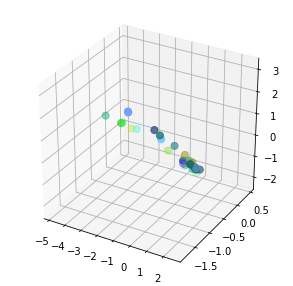

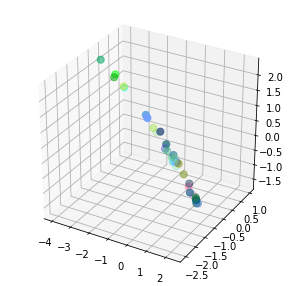

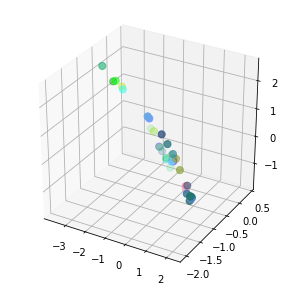

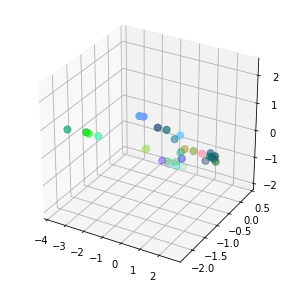

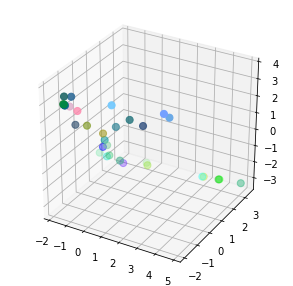

In [253]:
for m, v in model.items():
    data = analysis.summarize_walk_embedding_results(gensim_dict={"model":v}, 
                                                         ndim=3, 
                                                         cl_df=cldf)[["cluster_color", "Z0", "Z1", "Z2"]]
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data["Z0"], data["Z1"], data["Z2"], c=data["cluster_color"], s=50)
    plt.show()

### Look at the 3d embeddings in 2d dimensions

<Figure size 360x360 with 0 Axes>

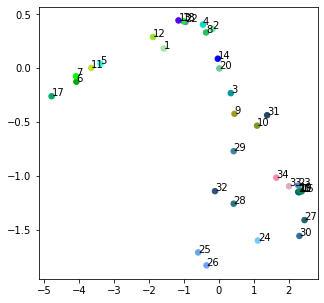

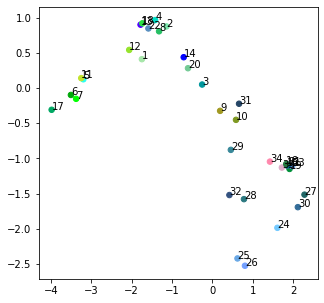

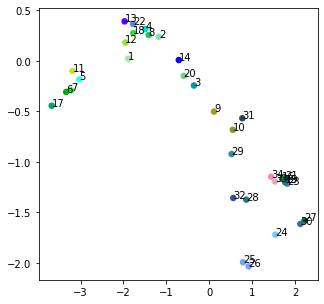

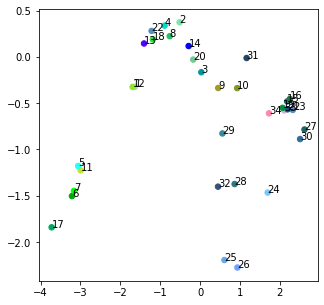

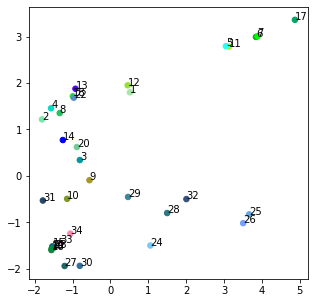

In [255]:
fig = plt.figure(figsize=(5,5))

for m, v in model.items():
    data = analysis.summarize_walk_embedding_results(gensim_dict={"model":v}, 
                                                         ndim=3, 
                                                         cl_df=cldf)[["cluster_color", "Z0", "Z1", "Z2"]]
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data["Z0"], data["Z1"], c=data["cluster_color"], s=30)
    for j, txt in enumerate(data.index.tolist()):
        ax.text(data['Z0'][j], data["Z1"][j], txt, size=10)
    plt.show()

### Find the closest neighbors to a given node to see how different are the results
##### As it is clear they are very similar except for the model[5]

In [264]:
def get_closest_nodes(model, ndim, node):
    data = analysis.summarize_walk_embedding_results(gensim_dict={"model": model}, 
                                                     ndim=ndim)
    
    target_idx = node
    print("Closet nodes to", node)
    print(" ")
    df = pd.DataFrame(columns=["node", "dist"])
    for idx in model.wv.index2word:
        dist = np.sqrt(sum(pow(data.loc[target_idx][["Z0", "Z1"]] - 
                               data.loc[idx][["Z0", "Z1"]], 2)))

        df = df.append({"node": idx,
                   "dist": dist}, ignore_index=True)
    return df.sort_values(by="dist")[0:7]

In [265]:
get_closest_nodes(model[1], 3, "31")

Closet nodes to 31
 


,node,dist
21,31,0.000000
28,10,0.303412
0,34,0.636577
2,33,0.908532
14,9,0.932310
15,29,1.012365
3,3,1.059041


In [266]:
get_closest_nodes(model[2], 3, "31")

Closet nodes to 31
 


,node,dist
15,31,0.000000
22,10,0.241250
9,9,0.479643
20,29,0.686884
3,3,0.954054
0,34,1.123545
6,32,1.320408


In [267]:
get_closest_nodes(model[3], 3, "31")

Closet nodes to 31
 


,node,dist
20,31,0.000000
32,10,0.250792
18,29,0.433766
12,9,0.664684
14,28,0.811431
6,32,0.817355
0,34,0.887640


In [268]:
get_closest_nodes(model[4], 3, "31")

Closet nodes to 31
 


,node,dist
19,31,0.000000
27,10,0.402858
10,9,0.782845
0,34,0.820144
16,29,1.016405
26,19,1.050582
2,33,1.100026


In [269]:
get_closest_nodes(model[4], 3, "31")

Closet nodes to 31
 


,node,dist
19,31,0.000000
27,10,0.402858
10,9,0.782845
0,34,0.820144
16,29,1.016405
26,19,1.050582
2,33,1.100026


In [270]:
get_closest_nodes(model[5], 3, "31")

Closet nodes to 31
 


,node,dist
17,31,0.000000
32,10,0.641402
23,15,1.016204
0,34,1.016762
2,33,1.020013
29,21,1.043363
22,23,1.058609


In [226]:
model[1].wv.vocab

{'1': <gensim.models.keyedvectors.Vocab at 0x1a57d60590>,
 '4': <gensim.models.keyedvectors.Vocab at 0x1a57d60610>,
 '3': <gensim.models.keyedvectors.Vocab at 0x1a57d605d0>,
 '8': <gensim.models.keyedvectors.Vocab at 0x1a57d60650>,
 '2': <gensim.models.keyedvectors.Vocab at 0x1a57d606d0>,
 '20': <gensim.models.keyedvectors.Vocab at 0x1a57d60750>,
 '34': <gensim.models.keyedvectors.Vocab at 0x1a57d60790>,
 '28': <gensim.models.keyedvectors.Vocab at 0x1a57d607d0>,
 '10': <gensim.models.keyedvectors.Vocab at 0x1a57d60690>,
 '22': <gensim.models.keyedvectors.Vocab at 0x1a57d60710>,
 '11': <gensim.models.keyedvectors.Vocab at 0x1a57d60810>,
 '33': <gensim.models.keyedvectors.Vocab at 0x1a57d60850>,
 '9': <gensim.models.keyedvectors.Vocab at 0x1a57d60890>,
 '13': <gensim.models.keyedvectors.Vocab at 0x1a57d608d0>,
 '25': <gensim.models.keyedvectors.Vocab at 0x1a57d60910>,
 '23': <gensim.models.keyedvectors.Vocab at 0x1a57d60950>,
 '29': <gensim.models.keyedvectors.Vocab at 0x1a57d60990>,
 '5

In [224]:
model[1].wv.index2word

['34',
 '1',
 '33',
 '3',
 '2',
 '32',
 '4',
 '24',
 '14',
 '6',
 '7',
 '8',
 '28',
 '30',
 '9',
 '29',
 '25',
 '20',
 '26',
 '5',
 '11',
 '31',
 '22',
 '16',
 '21',
 '15',
 '18',
 '17',
 '10',
 '19',
 '23',
 '13',
 '27',
 '12']